In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split as TTS
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('data_set.csv')

In [3]:
data.shape

(26083, 14)

In [4]:
data.info

<bound method DataFrame.info of         age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      57.0  1.0   3       145   233    1        0      150      0      2.3   
1      64.0  0.0   2       130   250    0        1      187      0      3.5   
2      52.0  1.0   1       130   204    0        0      172      0      1.4   
3      56.0  0.0   1       120   236    0        1      178      0      0.8   
4      66.0  0.0   0       120   354    0        1      163      1      0.6   
...     ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
26078  72.0  0.0   0       138   294    1        1      106      0      1.9   
26079  60.0  1.0   0       144   200    0        0      126      1      0.9   
26080  68.0  1.0   0       100   234    0        1      156      0      0.1   
26081  67.0  1.0   1       154   232    0        0      164      0      0.0   
26082  67.0  0.0   1       130   236    0        0      174      0      0.0   

       slope  ca  t

In [5]:
data.head

<bound method NDFrame.head of         age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      57.0  1.0   3       145   233    1        0      150      0      2.3   
1      64.0  0.0   2       130   250    0        1      187      0      3.5   
2      52.0  1.0   1       130   204    0        0      172      0      1.4   
3      56.0  0.0   1       120   236    0        1      178      0      0.8   
4      66.0  0.0   0       120   354    0        1      163      1      0.6   
...     ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
26078  72.0  0.0   0       138   294    1        1      106      0      1.9   
26079  60.0  1.0   0       144   200    0        0      126      1      0.9   
26080  68.0  1.0   0       100   234    0        1      156      0      0.1   
26081  67.0  1.0   1       154   232    0        0      164      0      0.0   
26082  67.0  0.0   1       130   236    0        0      174      0      0.0   

       slope  ca  tha

In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,26083.000000,26058.00000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000
mean,55.661389,0.50000,0.958594,131.592992,246.246061,0.149753,0.526512,149.655024,0.326573,1.039512,1.400299,0.721849,2.318752,0.547253
std,15.189768,0.50001,1.023931,17.588809,51.643522,0.356836,0.525641,22.858109,0.468969,1.165138,0.616513,1.011608,0.604659,0.497772
min,11.000000,0.00000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,0.00000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,0.50000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,67.000000,1.00000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,98.000000,1.00000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
data['target'].value_counts()

1    14274
0    11809
Name: target, dtype: int64

In [8]:
data.isnull().sum()

age          0
sex         25
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

In [9]:
data['sex'].mode()[0]

0.0

In [10]:
data['sex'] = data['sex'].fillna(data['sex'].mode()[0])

In [11]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: >

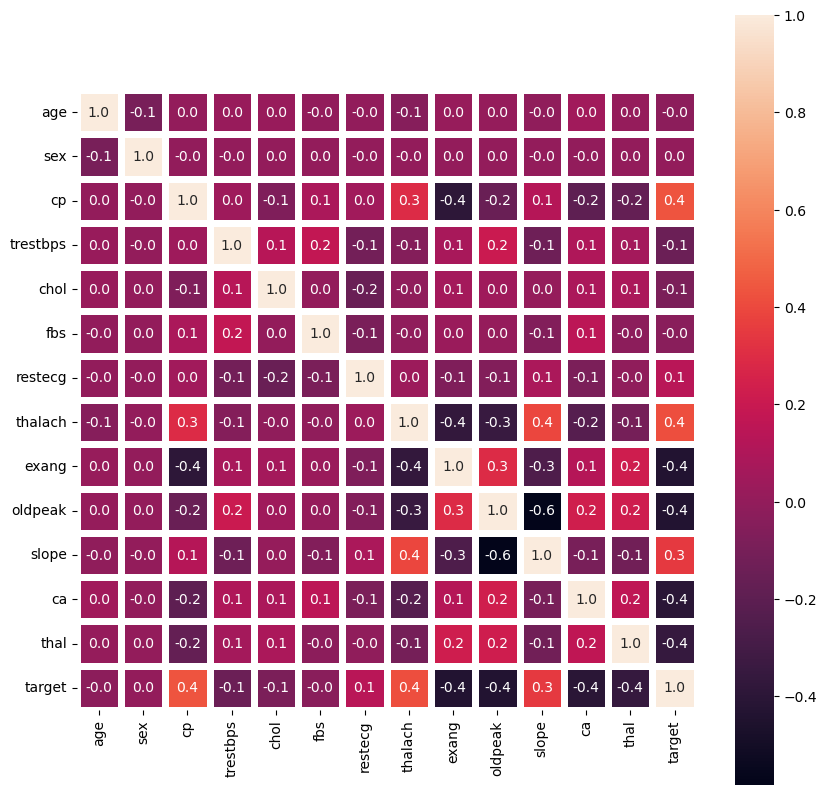

In [12]:
f,ax = plt.subplots(figsize=(10,10))
sb.heatmap(data.corr(),annot=True,linewidth=5,fmt='.1f',ax=ax,square=True)

In [13]:
Train,Test= TTS(data, test_size = 0.2, random_state = 4)

In [14]:
Train.shape


(20866, 14)

In [15]:
Test.shape

(5217, 14)

In [16]:
X_train = Train.drop(columns=['target'])
Y_train = Train['target']

In [17]:
X_test = Test.drop(columns=['target'])
Y_test = Test['target']

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

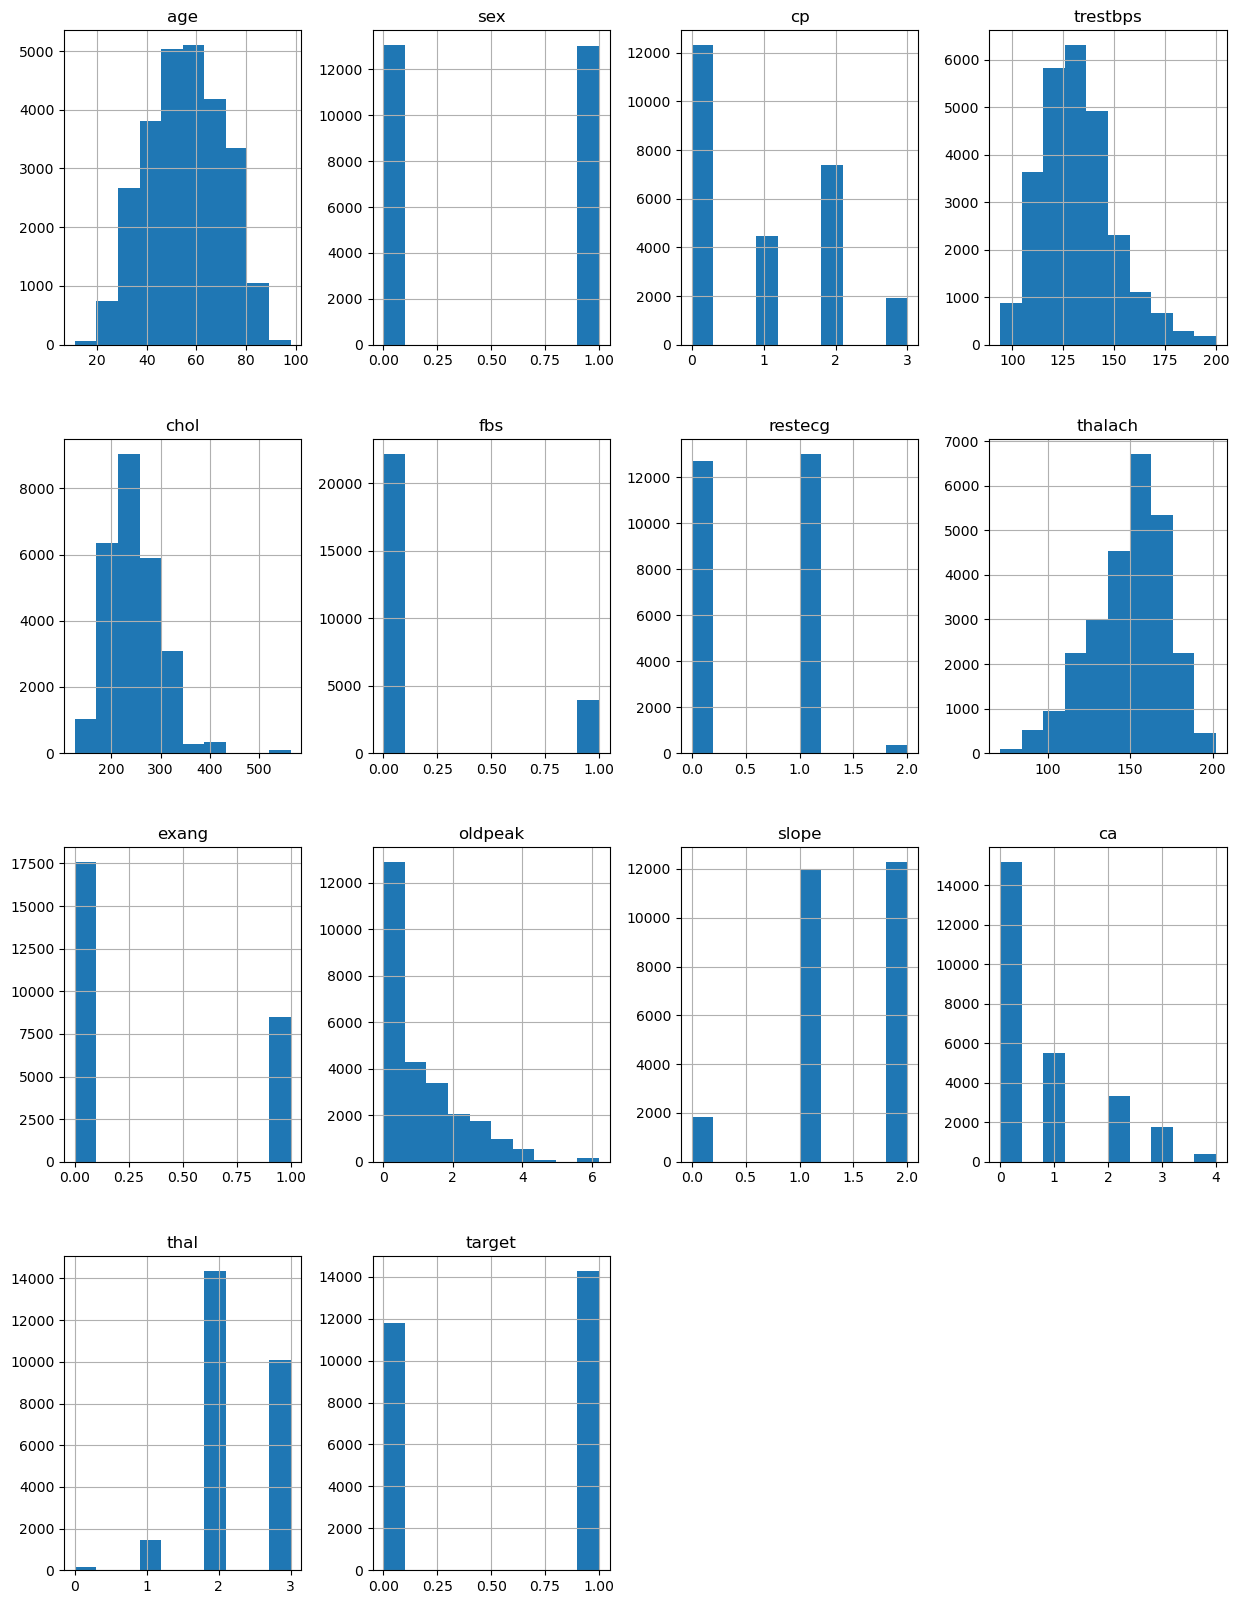

In [18]:
data.hist(figsize=(15,20))

In [19]:
scale = MinMaxScaler()
X_train_s = scale.fit_transform(X_train.values)
X_train = pd.DataFrame(X_train_s,index=X_train.index,columns=X_train.columns)

In [20]:
X_test_s = scale.fit_transform(X_test.values)
X_test = pd.DataFrame(X_test_s,index=X_test.index,columns=X_test.columns)

[4.68155178e-04 6.79950054e-05 1.35316590e-01 7.78317093e-02
 7.98472860e-02 1.66413735e-02 3.94806292e-02 1.06582964e-01
 9.91096048e-02 1.10807157e-01 6.85040365e-02 1.36904134e-01
 1.28438366e-01]


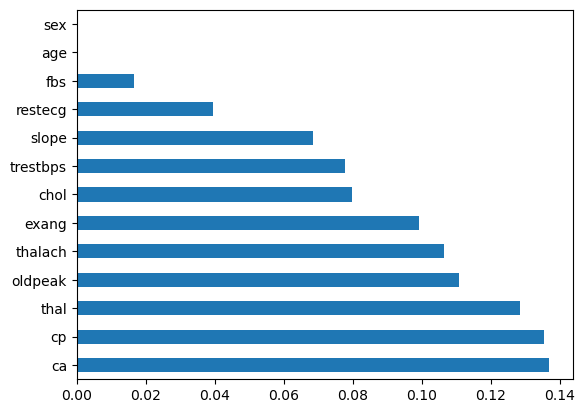

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train,Y_train)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_,index=X_train.columns)
feat_importances.nlargest(14).plot(kind='barh')
plt.show()

In [22]:
X_train = X_train.drop(columns=['sex','age'])
X_test = X_test.drop(columns=['sex','age'])

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

Accuracy: 0.831129
Precision: 0.832171
Recall: 0.831129
F1-Score: 0.830123


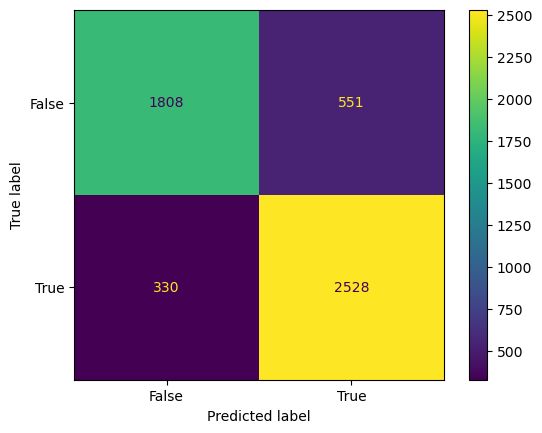

In [33]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred_nb = gnb.predict(X_test)
test_acc = accuracy_score(Y_test,Y_pred_nb)
test_pre = precision_score(Y_test,Y_pred_nb,average='weighted')
test_rec = recall_score(Y_test,Y_pred_nb,average='weighted')
test_f1 = f1_score(Y_test,Y_pred_nb,average='weighted')
print("Accuracy: {:f}".format(test_acc))
print("Precision: {:f}".format(test_pre))
print("Recall: {:f}".format(test_rec))
print("F1-Score: {:f}".format(test_f1))
confusion_mat = confusion_matrix(Y_test,Y_pred_nb)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])
cm_display.plot()
plt.show()

Accuracy: 0.911060
Precision: 0.913802
Recall: 0.911060
F1-Score: 0.910475


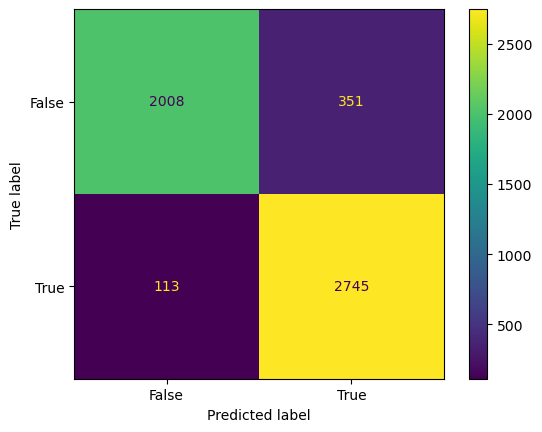

In [37]:
clf_r = RandomForestClassifier(max_depth=4, random_state=0)
clf_r.fit(X_train,Y_train)
Y_pred_rf = clf_r.predict(X_test) 
test_acc = accuracy_score(Y_test,Y_pred_rf)
test_pre = precision_score(Y_test,Y_pred_rf,average='weighted')
test_rec = recall_score(Y_test,Y_pred_rf,average='weighted')
test_f1 = f1_score(Y_test,Y_pred_rf,average='weighted')
print("Accuracy: {:f}".format(test_acc))
print("Precision: {:f}".format(test_pre))
print("Recall: {:f}".format(test_rec))
print("F1-Score: {:f}".format(test_f1))
confusion_mat = confusion_matrix(Y_test,Y_pred_rf)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])
cm_display.plot()
plt.show()

Accuracy: 0.858156
Precision: 0.866020
Recall: 0.858156
F1-Score: 0.856036


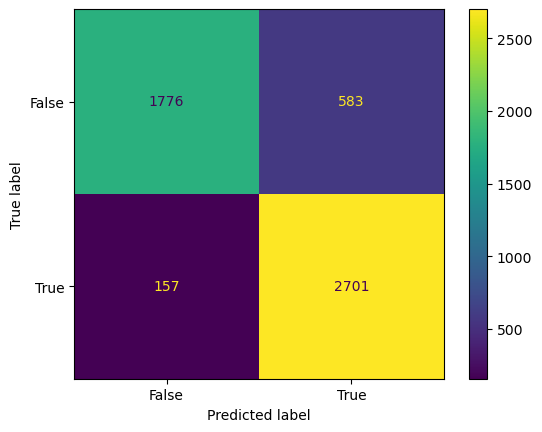

In [36]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
test_acc = accuracy_score(Y_test,Y_pred)
test_pre = precision_score(Y_test,Y_pred,average='weighted')
test_rec = recall_score(Y_test,Y_pred,average='weighted')
test_f1 = f1_score(Y_test,Y_pred,average='weighted')
print("Accuracy: {:f}".format(test_acc))
print("Precision: {:f}".format(test_pre))
print("Recall: {:f}".format(test_rec))
print("F1-Score: {:f}".format(test_f1))
confusion_mat = confusion_matrix(Y_test,Y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])
cm_display.plot()
plt.show()

Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
F1-Score: 1.000000


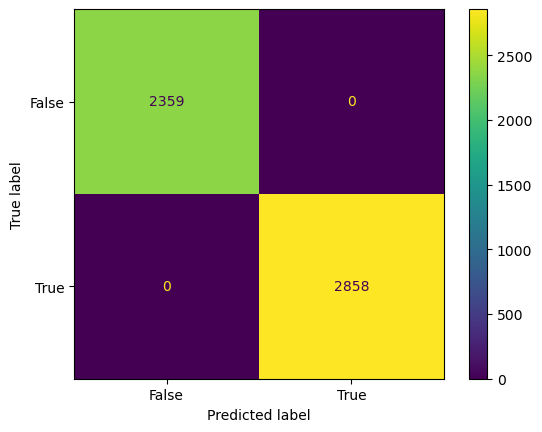

In [34]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train,Y_train)
Y_pred_KNN = model.predict(X_test)
test_acc = accuracy_score(Y_test,Y_pred_KNN)
test_pre = precision_score(Y_test,Y_pred_KNN,average='weighted')
test_rec = recall_score(Y_test,Y_pred_KNN,average='weighted')
test_f1 = f1_score(Y_test,Y_pred_KNN,average='weighted')
print("Accuracy: {:f}".format(test_acc))
print("Precision: {:f}".format(test_pre))
print("Recall: {:f}".format(test_rec))
print("F1-Score: {:f}".format(test_f1))
confusion_mat = confusion_matrix(Y_test,Y_pred_KNN)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])
cm_display.plot()
plt.show()